In [1]:
#! pip install plotly==5.11.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Sección 1: Obtención de Datos ###

Descargar los datos:

https://datos.cdmx.gob.mx/dataset/da3fcf80-f15f-4478-9795-26eddaa6fe86/resource/5d33f9c7-e033-4676-a02d-9e2129017acf/download/afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv

Los datos contendrán varias columnas:

- id: ID del registro o número de registro
- organismo: organismo utilizado de transporte (ecobici, metrobus, etc.)
- linea_servicio: línea de servicio, en caso de aplicar (línea 1, por ejemplo)
- dia: de la semana, domingo, lunes, etc.
- fecha: fecha del registro
- afluencia_tarjeta: Pago por tarjeta
- afluencia_boleto: pago por boleto
- afluencia_total_preliminar: pago total


In [2]:
raw_data = pd.read_csv('./raw_data.csv').set_index('id')
raw_data.head(10)

,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
id,,,,,,,
1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"
6,Ecobici,NaN,Viernes,2020-03-06,NaN,NaN,"29,035"
7,Ecobici,NaN,Sábado,2020-03-07,NaN,NaN,"12,800"
8,Ecobici,NaN,Domingo,2020-03-08,NaN,NaN,"11,911"
9,Ecobici,NaN,Lunes,2020-03-09,NaN,NaN,"23,154"


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 1 to 18714
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   organismo                   18714 non-null  object
 1   linea_servicio              18225 non-null  object
 2   dia                         18714 non-null  object
 3   fecha                       18714 non-null  object
 4   afluencia_tarjeta           2687 non-null   object
 5   afluencia_boleto            3598 non-null   object
 6   afluencia_total_preliminar  18512 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [4]:
max_non_nan = raw_data.count()
max_non_nan.columns = ['Columna','Datos']
columnas = max_non_nan.index[max_non_nan == max_non_nan.max()].tolist() 
print('Columnas con más datos no NaN:', columnas)

Columnas con más datos no NaN: ['organismo', 'dia', 'fecha']


In [5]:
print(raw_data.dtypes)

organismo                     object
linea_servicio                object
dia                           object
fecha                         object
afluencia_tarjeta             object
afluencia_boleto              object
afluencia_total_preliminar    object
dtype: object


In [7]:
organismo_mas_usado = raw_data.groupby('organismo')['organismo'].count()
id_omu = organismo_mas_usado.idxmax()
print('Organismo más usado:', id_omu)

Organismo más usado: STC


In [32]:
lineamu = raw_data.groupby(['linea_servicio','organismo'])
                              #')['linea_servicio'].value_counts().idxmax()

id_lineamu = lineamu['afluencia_total_preliminar'].count().max()
lineamu_count = lineamu['afluencia_total_preliminar'].count()

lineamu_count == id_lineamu

#if lineamu_count == id_lineamu:
#    print(lineamu_count['linea_servicio'], lineamu_count['organismo'])
#print('Linea de servicio más utilizadas son', id_lineamu, 'en las líneas', lineamu.ix[id_lineamu[0]])

linea_servicio                                     organismo      
Atenea                                             RTP                False
Eco Atenea                                         RTP                False
Ecobús                                             RTP                 True
Expreso                                            RTP                 True
Expreso Directo                                    RTP                False
L1                                                 Metrobús           False
                                                   STC                 True
                                                   Suburbano          False
L1 Campos Revolución-Tlalpexco                     STE-Cablebús       False
L1 Eje Central                                     STE-Trolebús       False
L12                                                STC                 True
L2                                                 Metrobús           False
                     

In [126]:
cantidad_dia = raw_data['dia'].value_counts()
dias_con_mas = cantidad_dia.index[cantidad_dia == cantidad_dia.max()].tolist()
diferencia = cantidad_dia['Jueves'] - cantidad_dia['Lunes']

print('Los días en los que más se usa el transporte público: ', dias_con_mas, 'por', diferencia, 'días')

cantidad_dia['Jueves']

Los días en los que más se usa el transporte público:  ['Jueves', 'Martes', 'Viernes'] por 2 días


2681

In [10]:
col_name = raw_data.keys()

for name in col_name:
    print(name, type(raw_data.at[1, name]))

organismo <class 'str'>
linea_servicio <class 'float'>
dia <class 'str'>
fecha <class 'str'>
afluencia_tarjeta <class 'float'>
afluencia_boleto <class 'float'>
afluencia_total_preliminar <class 'str'>


In [11]:
#raw_data['organismo'] = raw_data['organismo'].astype(str)
#raw_data['linea_servicio'] = raw_data['linea_servicio'].astype(str)
raw_data['fecha'] = pd.to_datetime(raw_data['fecha'])

raw_data['afluencia_tarjeta'] = raw_data['afluencia_tarjeta'].str.replace(',','') 
raw_data['afluencia_tarjeta'] = raw_data['afluencia_tarjeta'].astype(float)

raw_data['afluencia_boleto'] = raw_data['afluencia_boleto'].str.replace(',','') 
raw_data['afluencia_boleto'] = raw_data['afluencia_boleto'].astype(float)

raw_data['afluencia_total_preliminar'] = raw_data['afluencia_total_preliminar'].str.replace(',','') 
raw_data['afluencia_total_preliminar'] = raw_data['afluencia_total_preliminar'].astype(float)


In [12]:
print(raw_data.dtypes)
col_name = raw_data.keys()

for name in col_name:
    print(name, type(raw_data.at[1, name]))

organismo                             object
linea_servicio                        object
dia                                   object
fecha                         datetime64[ns]
afluencia_tarjeta                    float64
afluencia_boleto                     float64
afluencia_total_preliminar           float64
dtype: object
organismo <class 'str'>
linea_servicio <class 'float'>
dia <class 'str'>
fecha <class 'pandas._libs.tslibs.timestamps.Timestamp'>
afluencia_tarjeta <class 'numpy.float64'>
afluencia_boleto <class 'numpy.float64'>
afluencia_total_preliminar <class 'numpy.float64'>


In [13]:
porcentaje_NaN = raw_data.isnull().mean()
df_porcentaje_NaN = pd.DataFrame({'Columnas': raw_data.columns, 'Porcentaje NaNs': porcentaje_NaN})
df_porcentaje_NaN = df_porcentaje_NaN.set_index([pd.Index(range(len(df_porcentaje_NaN)))])
df_porcentaje_NaN

,Columnas,Porcentaje NaNs
0,organismo,0.000000
1,linea_servicio,0.026130
2,dia,0.000000
3,fecha,0.000000
4,afluencia_tarjeta,0.856418
5,afluencia_boleto,0.807738
6,afluencia_total_preliminar,0.010794


Text(0.5, 1.0, 'Porcentaje de datos nulos por columna')

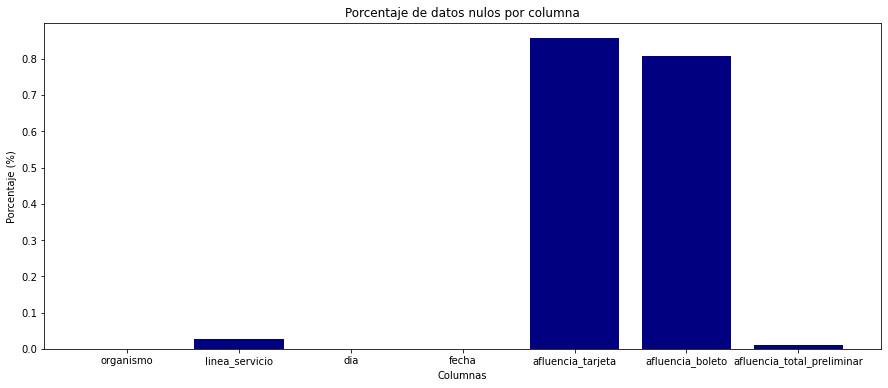

In [14]:
fig = plt.figure(figsize=(15,6))
plt.bar(df_porcentaje_NaN['Columnas'], df_porcentaje_NaN['Porcentaje NaNs'], color='navy')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de datos nulos por columna')

In [15]:
def plot_nans(organismo):
    df_organismo = raw_data[raw_data['organismo'] == organismo]
    porcentaje_NaN_org = df_organismo.isnull().sum()
    df_porcentaje_NaN_org = pd.DataFrame({'Columnas': df_organismo.columns, 'Porcentaje NaNs': porcentaje_NaN_org})
    
    fig = plt.figure(figsize=(15,6))
    plt.bar(df_porcentaje_NaN_org['Columnas'], df_porcentaje_NaN_org['Porcentaje NaNs'], color='navy')
    plt.xlabel('Columnas')
    plt.ylabel('Porcentaje (%)')
    plt.title('Porcentaje de datos nulos por columna: ' + str(organismo))
    
    print(df_porcentaje_NaN_org)

                                              Columnas  Porcentaje NaNs
organismo                                    organismo                0
linea_servicio                          linea_servicio              489
dia                                                dia                0
fecha                                            fecha                0
afluencia_tarjeta                    afluencia_tarjeta              489
afluencia_boleto                      afluencia_boleto              489
afluencia_total_preliminar  afluencia_total_preliminar                1


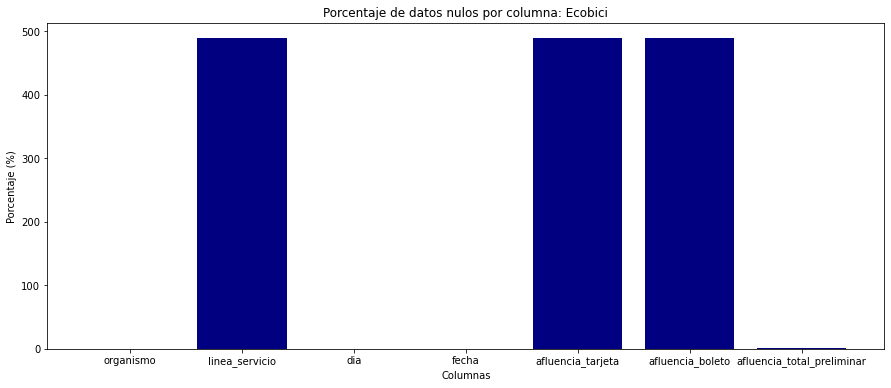

In [16]:
plot_nans('Ecobici')

In [17]:
def plot_orgs(columna):
    df_columna = raw_data[['organismo', columna]].copy()
    df_distr_org = df_columna.groupby('organismo').agg({columna: lambda x: x.isnull().sum()}).sort_values(by = columna)
 

    ax = df_distr_org.plot.bar(y=columna, width=0.9, figsize = (12, 4))
    ax.set_xlabel("Organismo")
    ax.set_ylabel("Cantidad de datos nulos")
    ax.set_title('Datos nulos por organismo: ' + str(columna))

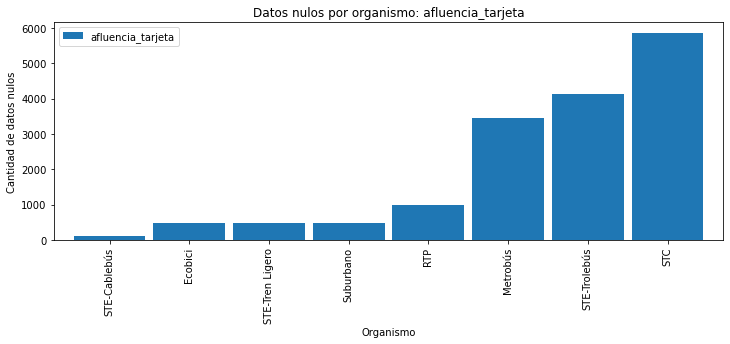

In [18]:
plot_orgs('afluencia_tarjeta')


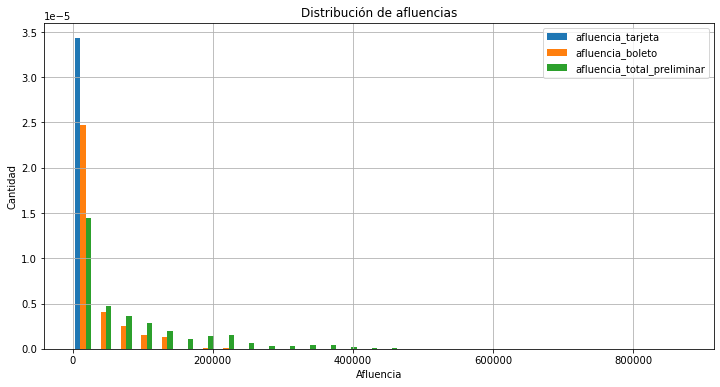

In [256]:
df_columna_bla = raw_data[['afluencia_tarjeta', 'afluencia_boleto','afluencia_total_preliminar']].copy()
fig = plt.figure(figsize=(12,6))
plt.hist(df_columna_bla, density = True, label = ['afluencia_tarjeta', 'afluencia_boleto','afluencia_total_preliminar'], bins=30)
plt.legend()
plt.title('Distribución de afluencias')
plt.xlabel('Afluencia')
plt.ylabel('Cantidad')
plt.grid()

<AxesSubplot:>

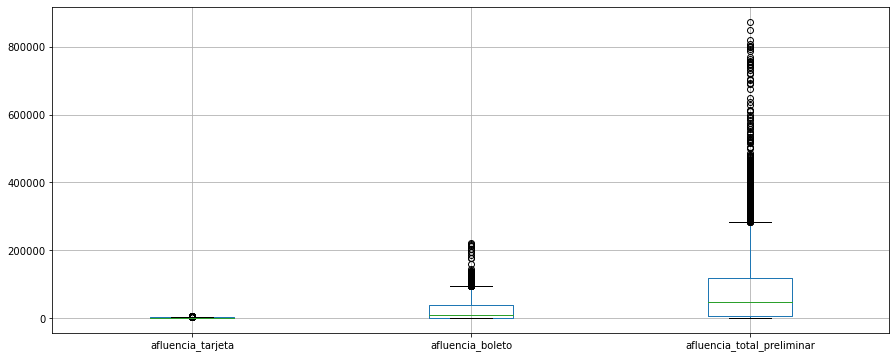

In [130]:
fig = plt.figure(figsize=(15,6))
raw_data.boxplot()

<AxesSubplot:xlabel='dia', ylabel='organismo'>

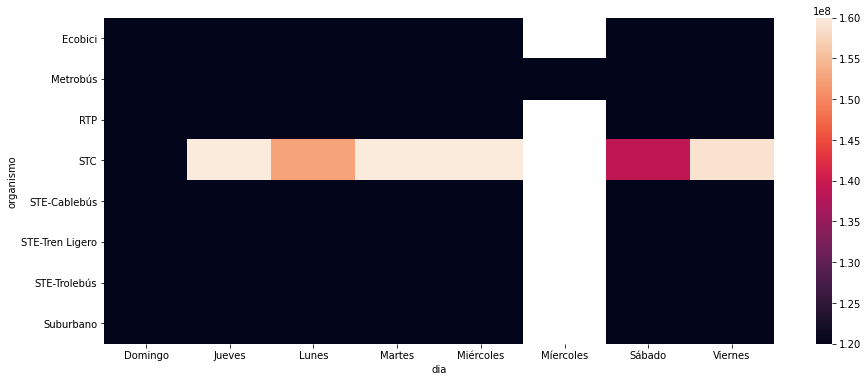

In [231]:
group_af_tot = raw_data.groupby(['organismo','dia'])['afluencia_total_preliminar'].sum()
group_af_tot = group_af_tot.unstack(level = -1)

fig = plt.figure(figsize = (15,6))
sns.heatmap(group_af_tot, vmin = 1.2e8, vmax = 1.6e8)#cmap="BuPu")

<AxesSubplot:xlabel='organismo', ylabel='linea_servicio'>

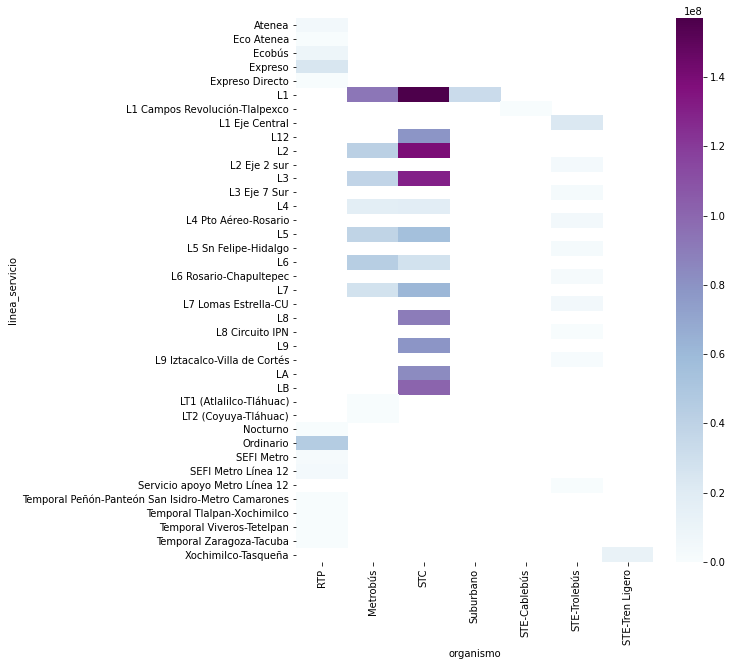

In [232]:
group_af_tot_lin = raw_data.groupby(['linea_servicio','organismo'])['afluencia_total_preliminar'].sum()
group_af_tot_lin = group_af_tot_lin.unstack(level = -1)

fig = plt.figure(figsize = (8,10))
sns.heatmap(group_af_tot_lin, cmap="BuPu")

In [233]:
linea_mas_us = raw_data[raw_data['organismo'] == 'STC'].groupby('linea_servicio')['afluencia_total_preliminar'].sum()
id_linea_mas_us = linea_mas_us.idxmax()
porc_linea = linea_mas_us[id_linea_mas_us] / linea_mas_us.sum()
print('Linea de servicio más usada es ', id_linea_mas_us, 'con la suma de afluencia total preliminar de', linea_mas_us[id_linea_mas_us])
print('Porcentaje con respecto al respecto al resto de las líneas:', porc_linea*100, '%')

Linea de servicio más usada es  L1 con la suma de afluencia total preliminar de 156984799.0
Porcentaje con respecto al respecto al resto de las líneas: 15.346698953186818 %


## Sección 3: Transformación de datos ##


In [139]:
raw_data_nona = raw_data.dropna(how = 'any')
proporcion = len(raw_data_nona) / len(raw_data)
print('Propoción: ', proporcion)
raw_data_nona

Propoción:  0.14352890883830288


,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
id,,,,,,,
3951,RTP,Ordinario,Domingo,2020-03-01,51.0,85298.0,85349.0
3952,RTP,Expreso,Domingo,2020-03-01,1537.0,42745.0,44282.0
3954,RTP,Ecobús,Domingo,2020-03-01,555.0,16231.0,16786.0
3955,RTP,Nocturno,Domingo,2020-03-01,59.0,7531.0,7590.0
3957,RTP,Expreso Directo,Domingo,2020-03-01,1.0,0.0,1.0
...,...,...,...,...,...,...,...
7607,RTP,Expreso,Jueves,2021-07-01,5442.0,51905.0,57347.0
7609,RTP,Ecobús,Jueves,2021-07-01,2525.0,20658.0,23183.0
7610,RTP,Nocturno,Jueves,2021-07-01,43.0,642.0,685.0


In [153]:
raw_data.duplicated().sum()

0

In [154]:
raw_data.dtypes

organismo                             object
linea_servicio                        object
dia                                   object
fecha                         datetime64[ns]
afluencia_tarjeta                    float64
afluencia_boleto                     float64
afluencia_total_preliminar           float64
dtype: object

In [161]:
display(raw_data_nona['fecha'].dt.day)
display(raw_data_nona['fecha'].dt.weekday)

id
3951    1
3952    1
3954    1
3955    1
3957    1
       ..
7607    1
7609    1
7610    1
7612    1
7613    1
Name: fecha, Length: 2686, dtype: int64

id
3951    6
3952    6
3954    6
3955    6
3957    6
       ..
7607    3
7609    3
7610    3
7612    3
7613    3
Name: fecha, Length: 2686, dtype: int64

In [169]:
raw_data['organismo'].str.contains('Metrobús').sum()

3461

In [170]:
raw_data['linea_servicio'].str.contains('Temporal').sum()

155

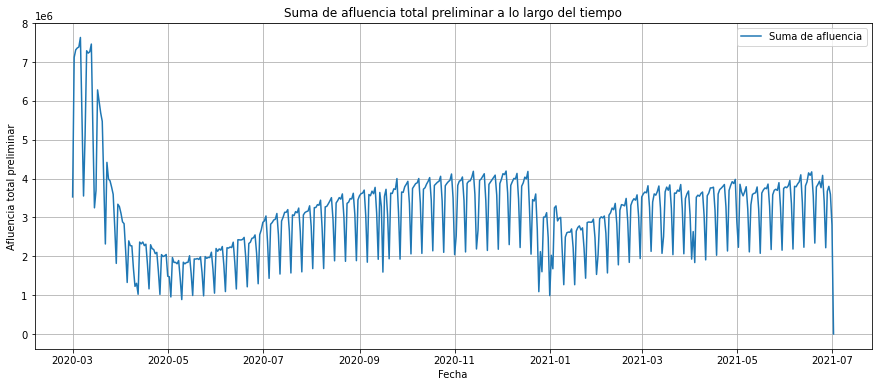

In [240]:
group_fecha = raw_data.groupby('fecha')['afluencia_total_preliminar'].sum()
fig = plt.figure(figsize = (15,6))
plt.plot(group_fecha, label = 'Suma de afluencia')
plt.title('Suma de afluencia total preliminar a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Afluencia total preliminar')
plt.legend()
plt.grid()

# Investigacion #

Profundiza el tema de programación orientada a objetos y crea las clases (Concepto de programación orientada a objetos) necesarias para ejemplificar los siguientes conceptos, agrega el código dentro del notebook que contiene tu proyecto de movilidad: 

    Métodos  
    Atributos  
    Herencia  
    Polimorfismo  
    Encapsulación  

#### Métodos ####

Las clases son una forma de agregar funcionalidades específicas dentro de un programa. Estas se usan para crear un nuevo tipo de objeto con propiedades y capacidades únicas. Las funciones que son específicas para un tipo de clase se les conoce como "métodos", es decir, un método es un tipo de función que le pertenece a un objeto.


#### Atributos ####

Los atributos son las "características" de las instancias (u objetos) de una clase. Es decir son variables de dicho objeto que pueden ser utilizadas y accesadas dependiendo de la forma en la que se definen en la clase.

#### Herencia ####

Cuando se define una nueva clase, se puede usar otra clase para facilitar esto. El concepto de herencia se refiere a la capacidad de dicha nueva clase de heredar o adquirir todos los métodos y propiedades de la otra clase.

#### Polimorfismo ####

El polimorfismo se refiere a cuando una clase hija define su propia versión de algunos métodos que heredo de la clase padre.


#### Encapsulación ####

La encapsulación es un mecanismo a través del cual se pueden envolver los datos, variables y métodos de tal forma que todos están juntos y actúan como una sola unidad. Esto significa que las variables no son accesibles a menos que se usen los mismos métodos de la clase definida.


In [257]:
class livingbeing:
    
    def __init__(self):
        # Atributos
        self.edad = 0
        self.color = 'blanco'
        self.estatura = 0.0
    
    # Método    
    def prod_energia(self):
        print("Produciendo ATP")        

In [259]:
# Herencia
class animal(livingbeing):
    
    def __init__(self):
        # Atributos
        self.patas = 4
        self.dieta = []
        self.locacion = 'México'
    
    # Polimorfismo
    def prod_energia(self):
        print("Buscando comida")
        print("Comida encontrada")
        print("Digiriendo comida, produciendo glucosa")

# Herencia
class planta(livingbeing):
    
    def __init__(self):
        # Atributos
        self.hojas = 120
        self.tipo = 'hongo'
        self.clima = 'caliente'
        self.fruto = True
        
    # Polimorfismo
    def prod_energia(self):
        print("Absorbiendo sol, produciendo glucosa")
        print("Se requiere agua")